In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import plt_conf as conf 

import rutinas as ru
import pandas as pd
# import scipy


from scipy.linalg import solve, norm, eig, eigh
# from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

import plt_conf as conf

In [2]:
conf.general()  # cargando configuración general

In [2]:
def complex_quadrature(func, a, b, **kwargs):
    
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

In [4]:
?ru.profiles

In [12]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 1 #1,1

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.33783151192188826 radio 32.99436221518425
masa  -10.714976632789813 Uf  -0.3247517428252849

E(U(inf))  -0.053727409224277295
energía =  -0.1583693272407303 $\lambda = $ 0.27998193449879394

Checking normalización,  1.0000000000706648 1
checking  -1.0101388079394344 10.714977040823765 0.296461078084562 -0.1583693272407303
Checking normalización, 1.0000000006371232 1
Checking convergencia de la Energía U(inf), U(asint) -0.15813046858103658 -0.1583693272407303


In [13]:
# calculando autovalores y autovectores por método espectral
L = 200*(nodos+1)
N = int(L*3/4)
lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell) # , V1

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

$$(A_1, A_2)=\int_{0}^{\infty} A_1^{*}A_{2} r^2 dr$$

$$\delta^{2}[A_R]=-\lambda_R(A_R, B_I)-\lambda_I(A_R, B_R)$$


$$\delta^{2}[A_I]=\lambda_R(A_I, B_R)-\lambda_I(A_I, B_I)$$

In [14]:
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

print(autoval)

[-0.00619398-0.03340186j -0.00619398+0.03340186j  0.00619398+0.03340186j
  0.00619398-0.03340186j]


Autovalor analizado,  (-0.006193981378647266-0.03340185626074365j)
Checking interpolation


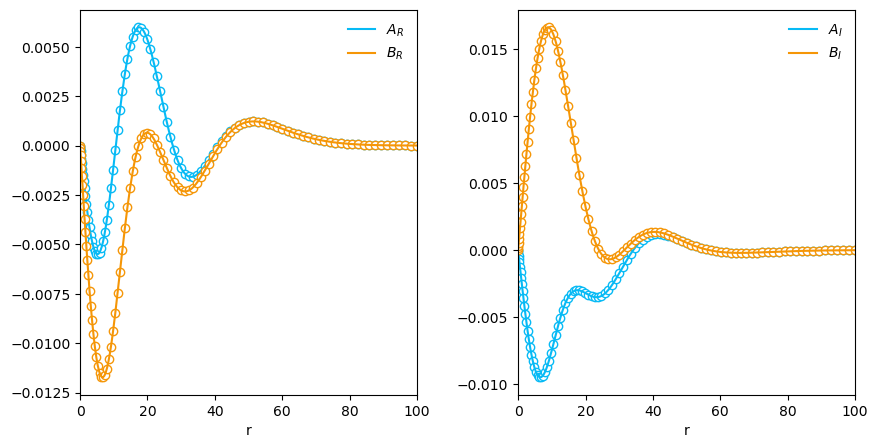

$\delta A_R = $ 0.0037617061099427646
$\delta A_I = $ -0.0037617470001630217
$\delta A_R+\delta A_I = $ -4.0890220257081694e-08
 
ponderado $A_R = $ 1.358181646774358
ponderado $A_I = $ 1.3581768924339144
 
Autovalor analizado,  (-0.006193981378628133+0.03340185626074508j)
Checking interpolation


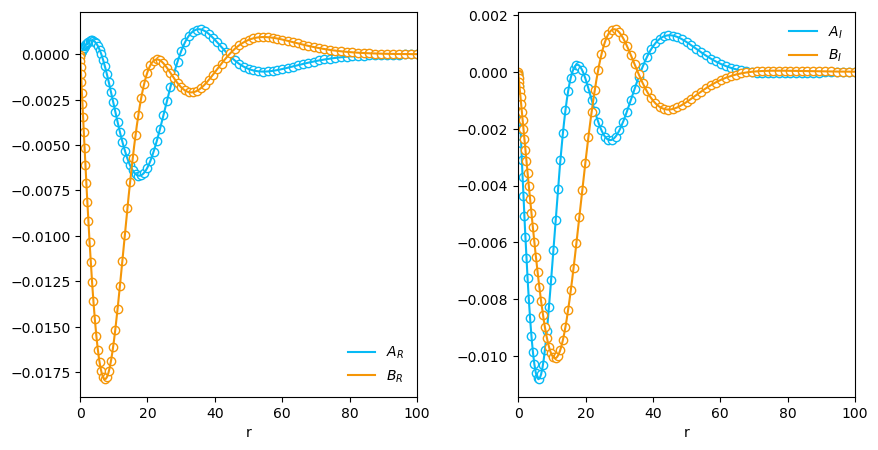

$\delta A_R = $ 0.0002803887759801393
$\delta A_I = $ -0.00028042877167266326
$\delta A_R+\delta A_I = $ -3.999569252394544e-08
 
ponderado $A_R = $ 0.22002956824541642
ponderado $A_I = $ 0.22006776952224102
 
Autovalor analizado,  (0.006193981378628134+0.03340185626074508j)
Checking interpolation


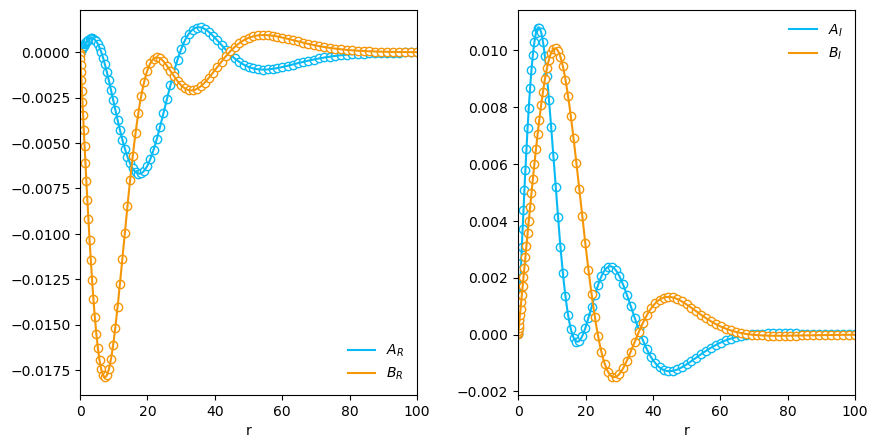

$\delta A_R = $ 0.00028038877598013953
$\delta A_I = $ -0.0002804287716726635
$\delta A_R+\delta A_I = $ -3.999569252394544e-08
 
ponderado $A_R = $ 0.2200295682454165
ponderado $A_I = $ 0.2200677695222411
 
Autovalor analizado,  (0.006193981378647266-0.03340185626074365j)
Checking interpolation


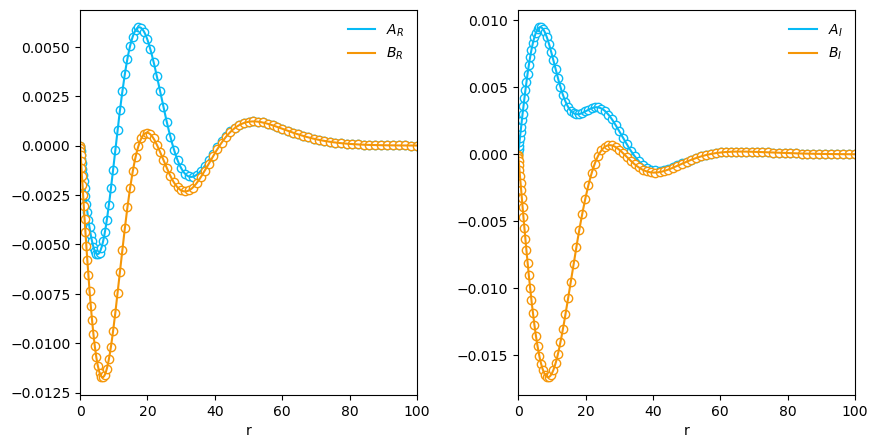

$\delta A_R = $ 0.0037617061099427646
$\delta A_I = $ -0.0037617470001630217
$\delta A_R+\delta A_I = $ -4.0890220257081694e-08
 
ponderado $A_R = $ 1.358181646774358
ponderado $A_I = $ 1.3581768924339144
 


In [15]:
#%%capture --no-display
import warnings

warnings.filterwarnings('ignore')


rad = np.array([(-x1[i]+1)*L/2. for i in range(N+1)])
radios = np.linspace(rad[1], rad[-2], 1000)

datosAR = []
datosAI = []
for ii in range(len(autoval)):
    #if ii==2 or ii==3:
    #    continue 
        
    Es0 = autovec[:, ii]
    lam = autoval[ii]  # asignando autovalor
    a0, b0 = Es0[:(N-1)], Es0[(N-1):]  # asignando los autovectores
    
    lamR, lamI = np.real(lam), np.imag(lam)
    print('Autovalor analizado, ', lam)

    # pasando a las variables mayusculas
    dist = rad[1:-1]  # recordar que se eliminan la primera y ultima en el cálculo
    A0 = a0/dist  
    B0 = b0/dist

    # interpolando para la integración parte real e imaginaria
    typeEl = 'quadratic' # 'linear' # 'quadratic'

    fA0 = interp1d(dist, A0, kind=typeEl)
    fB0 = interp1d(dist, B0, kind=typeEl)
    
    # checking
    print('Checking interpolation')
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10,5),
                      gridspec_kw={'wspace':0.3, 'hspace':0})


    ax[0].plot(dist, np.real(A0), ls=' ', marker='o', color='#07baf5', mfc='white')
    ax[0].plot(radios, np.real(fA0(radios)), color='#07baf5' , label=r'$A_R$')    
    ax[0].plot(dist, np.real(B0), ls=' ', marker='o', color='#f59607', mfc='white')
    ax[0].plot(radios, np.real(fB0(radios)), color='#f59607', label=r'$B_R$')
    ax[0].set_xlim(0, 100)
    ax[0].set_xlabel(r'r')
    ax[0].legend(frameon=False)
    
    ax[1].plot(dist, np.imag(A0), ls=' ', marker='o', color='#07baf5', mfc='white')
    ax[1].plot(radios, np.imag(fA0(radios)), color='#07baf5' , label=r'$A_I$')    
    ax[1].plot(dist, np.imag(B0), ls=' ', marker='o', color='#f59607', mfc='white')
    ax[1].plot(radios, np.imag(fB0(radios)), color='#f59607', label=r'$B_I$')
    ax[1].set_xlim(0, 100)
    ax[1].set_xlabel(r'r')
    ax[1].legend(frameon=False)
    
    plt.show()
    
    # creando funcionales
    f1 = lambda x: x**2*np.real(fA0(x))*np.real(fB0(x))  # (A_R, B_R)
    f12 = lambda x: x**2*np.real(fA0(x))*np.imag(fB0(x))  # (A_R, B_I)
    
    f2 = lambda x: x**2*np.imag(fA0(x))*np.real(fB0(x))  # (A_I, B_R)
    f22 = lambda x: x**2*np.imag(fA0(x))*np.imag(fB0(x))  # (A_I, B_I)
    
    # integrales
    int1 = -lamI*quad(f1, dist[0], dist[-1])[0]
    int12 = -lamR*quad(f12, dist[0], dist[-1])[0]
    
    int2 = lamR*quad(f2, dist[0], dist[-1])[0]
    int22 = -lamI*quad(f22, dist[0], dist[-1])[0]
    
    # resultado
    deltaA_R = int1 + int12
    deltaA_I = int2 + int22
    
    # valor ponderado
    deltaA_RP = abs(deltaA_R/(int1 - int12)) # (-int1 - int12)
    deltaA_IP = abs(deltaA_I/(int2 - int22)) # (-int2 - int22)
    
    print(r'$\delta A_R = $', deltaA_R)
    print(r'$\delta A_I = $', deltaA_I)
    print(r'$\delta A_R+\delta A_I = $', deltaA_R+deltaA_I)
    print(' ')
    print(r'ponderado $A_R = $', deltaA_RP)
    print(r'ponderado $A_I = $', deltaA_IP)
    print(' ')
    
    datosAR.append([ell, nodos, lamR, lamI, int1, int12, deltaA_R, deltaA_RP])
    datosAI.append([ell, nodos, lamR, lamI, int2, int22, deltaA_I, deltaA_IP])

datosAR = np.array(datosAR)
datosAI = np.array(datosAI)

In [17]:
nameAR = 'datosAR_l_%1d_n%1d.dat'%(ell, nodos)
np.savetxt(nameAR, datosAR, header='ell, nodos, lamR, lamI, int1, int12, deltaA_R, deltaA_RP')

nameAI = 'datosAI_l_%1d_n%1d.dat'%(ell, nodos)
np.savetxt(nameAI, datosAI, header='ell, nodos, lamR, lamI, int2, int22, deltaA_I, deltaA_IP')

In [9]:
evaL = -0.01185117j
val=min(np.abs(lEnigF1-(0+evaL)))
ind = np.abs(lEnigF1-(0+evaL))==val

autovec = VF1[:, ind]
autoval = lEnigF1[ind]

print(autoval)

[0.-0.01185117j]


Autovalor analizado,  -0.011851174056022255j
Checking interpolation


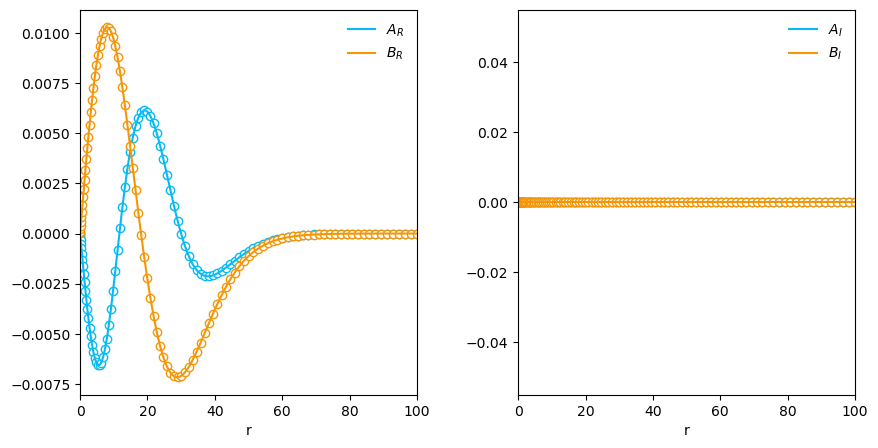

$\delta A_R = $ 0.0009816378106660586
$\delta A_I = $ 0.0
$\delta A_R+\delta A_I = $ 0.0009816378106660586
 
ponderado $A_R = $ 1.0
ponderado $A_I = $ nan
 


In [10]:
#%%capture --no-display
import warnings

warnings.filterwarnings('ignore')


rad = np.array([(-x1[i]+1)*L/2. for i in range(N+1)])
radios = np.linspace(rad[1], rad[-2], 1000)

datosAR = []
datosAI = []
for ii in range(len(autoval)):
    #if ii==2 or ii==3:
    #    continue 
        
    Es0 = autovec[:, ii]
    lam = autoval[ii]  # asignando autovalor
    a0, b0 = Es0[:(N-1)], Es0[(N-1):]  # asignando los autovectores

    lamR, lamI = np.real(lam), np.imag(lam)
    print('Autovalor analizado, ', lam)

    # pasando a las variables mayusculas
    dist = rad[1:-1]  # recordar que se eliminan la primera y ultima en el cálculo
    A0 = a0/dist  
    B0 = b0/dist

    # interpolando para la integración parte real e imaginaria
    typeEl = 'quadratic' # 'linear' # 'quadratic'

    fA0 = interp1d(dist, A0, kind=typeEl)
    fB0 = interp1d(dist, B0, kind=typeEl)
    
    
    # checking
    print('Checking interpolation')
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10,5),
                       gridspec_kw={'wspace':0.3, 'hspace':0})


    ax[0].plot(dist, np.real(A0), ls=' ', marker='o', color='#07baf5', mfc='white')
    ax[0].plot(radios, np.real(fA0(radios)), color='#07baf5' , label=r'$A_R$')    
    ax[0].plot(dist, np.real(B0), ls=' ', marker='o', color='#f59607', mfc='white')
    ax[0].plot(radios, np.real(fB0(radios)), color='#f59607', label=r'$B_R$')
    ax[0].set_xlim(0, 100)
    ax[0].set_xlabel(r'r')
    ax[0].legend(frameon=False)
    
    ax[1].plot(dist, np.imag(A0), ls=' ', marker='o', color='#07baf5', mfc='white')
    ax[1].plot(radios, np.imag(fA0(radios)), color='#07baf5' , label=r'$A_I$')    
    ax[1].plot(dist, np.imag(B0), ls=' ', marker='o', color='#f59607', mfc='white')
    ax[1].plot(radios, np.imag(fB0(radios)), color='#f59607', label=r'$B_I$')
    ax[1].set_xlim(0, 100)
    ax[1].set_xlabel(r'r')
    ax[1].legend(frameon=False)
    
    plt.show()
    
    # creando funcionales
    f1 = lambda x: x**2*np.real(fA0(x))*np.real(fB0(x))  # (A_R, B_R)
    f12 = lambda x: x**2*np.real(fA0(x))*np.imag(fB0(x))  # (A_R, B_I)
    
    f2 = lambda x: x**2*np.imag(fA0(x))*np.real(fB0(x))  # (A_I, B_R)
    f22 = lambda x: x**2*np.imag(fA0(x))*np.imag(fB0(x))  # (A_I, B_I)
    
    # integrales
    int1 = -lamI*quad(f1, dist[0], dist[-1])[0]
    int12 = -lamR*quad(f12, dist[0], dist[-1])[0]
    
    
    int2 = lamR*quad(f2, dist[0], dist[-1])[0]
    int22 = -lamI*quad(f22, dist[0], dist[-1])[0]
    
    # resultado
    deltaA_R = int1 + int12
    deltaA_I = int2 + int22
    
    # valor ponderado
    deltaA_RP = abs(deltaA_R/(int1 - int12)) # (-int1 - int12)
    deltaA_IP = abs(deltaA_I/(int2 - int22)) # (-int2 - int22)
    
    print(r'$\delta A_R = $', deltaA_R)
    print(r'$\delta A_I = $', deltaA_I)
    print(r'$\delta A_R+\delta A_I = $', deltaA_R+deltaA_I)
    print(' ')
    print(r'ponderado $A_R = $', deltaA_RP)
    print(r'ponderado $A_I = $', deltaA_IP)
    print(' ')
    
    datosAR.append([ell, nodos, lamR, lamI, int1, int12, deltaA_R, deltaA_RP])
    datosAI.append([ell, nodos, lamR, lamI, int2, int22, deltaA_I, deltaA_IP])

datosAR = np.array(datosAR)
datosAI = np.array(datosAI)


Text(0.5, 0.98, '$\\ell$-value = 0')

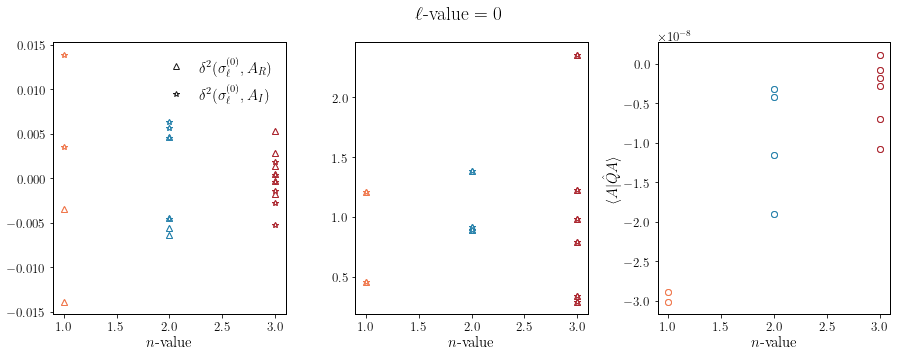

In [6]:
#%%capture --no-display
import warnings

warnings.filterwarnings('ignore')

ell = 0

dat_AR, dat_ARP = [], []
dat_AI, dat_AIP = [], []
for i in range(1, 4):
    nameAR = 'datosAR_l_%1d_n%1d.dat'%(ell, i)
    nameAI = 'datosAI_l_%1d_n%1d.dat'%(ell, i)

    _, nodos, _, _, _, _, deltaA_R, deltaA_RP = np.loadtxt(nameAR, unpack=True)
    _, _, lamR, lamI, int2, int22, deltaA_I, deltaA_IP = np.loadtxt(nameAI, unpack=True)
    
    dat_AR.append([nodos, deltaA_R])
    dat_ARP.append([nodos, deltaA_RP])
    dat_AI.append([nodos, deltaA_I])
    dat_AIP.append([nodos, deltaA_IP])

dat_AR = np.array(dat_AR)
dat_ARP = np.array(dat_ARP)
dat_AI = np.array(dat_AI)
dat_AIP = np.array(dat_AIP)


col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(15,5),
                       gridspec_kw={'wspace':0.3, 'hspace':0})
for ii in range(1, 4):
    j = ii-1
    ax[0].plot(dat_AR[j][0], dat_AR[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[0].plot(dat_AI[j][0], dat_AI[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[1].plot(dat_ARP[j][0], dat_ARP[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[1].plot(dat_AIP[j][0], dat_AIP[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[2].plot(dat_AR[j][0], dat_AR[j][1]+dat_AI[j][1], ls=' ', color=col[ii], marker='o', mfc='white')

ax[0].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[0].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_I$)')

ax[1].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[1].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_I$)')


ax[0].legend(frameon=False)

ax[0].set_xlabel(r'$n$-value')
ax[1].set_xlabel(r'$n$-value')
ax[2].set_xlabel(r'$n$-value')

ax[2].set_ylabel(r'$\langle A| \hat{Q} A \rangle$')

fig.suptitle(r'$\ell$-value = %1d'%ell)


Text(0.5, 0.98, '$\\ell$-value = 1')

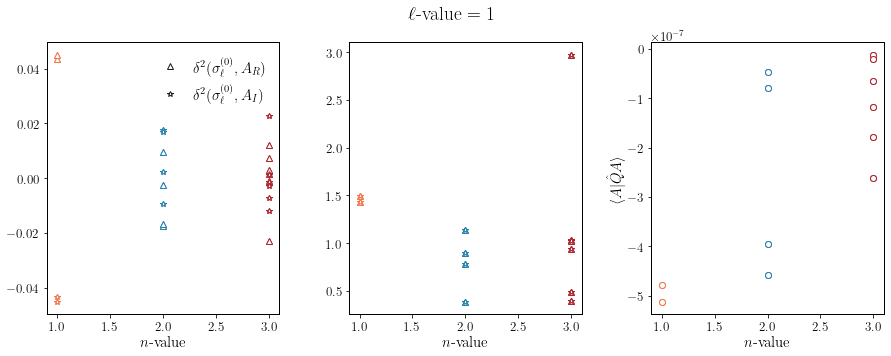

In [8]:
ell = 1

dat_AR, dat_ARP = [], []
dat_AI, dat_AIP = [], []
for i in range(1, 4):
    nameAR = 'datosAR_l_%1d_n%1d.dat'%(ell, i)
    nameAI = 'datosAI_l_%1d_n%1d.dat'%(ell, i)

    _, nodos, _, _, _, _, deltaA_R, deltaA_RP = np.loadtxt(nameAR, unpack=True)
    _, _, lamR, lamI, int2, int22, deltaA_I, deltaA_IP = np.loadtxt(nameAI, unpack=True)
    
    dat_AR.append([nodos, deltaA_R])
    dat_ARP.append([nodos, deltaA_RP])
    dat_AI.append([nodos, deltaA_I])
    dat_AIP.append([nodos, deltaA_IP])

dat_AR = np.array(dat_AR)
dat_ARP = np.array(dat_ARP)
dat_AI = np.array(dat_AI)
dat_AIP = np.array(dat_AIP)


col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(15,5),
                       gridspec_kw={'wspace':0.3, 'hspace':0})
for ii in range(1, 4):
    j = ii-1
    ax[0].plot(dat_AR[j][0], dat_AR[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[0].plot(dat_AI[j][0], dat_AI[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[1].plot(dat_ARP[j][0], dat_ARP[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[1].plot(dat_AIP[j][0], dat_AIP[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[2].plot(dat_AR[j][0], dat_AR[j][1]+dat_AI[j][1], ls=' ', color=col[ii], marker='o', mfc='white')

ax[0].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[0].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_I$)')

ax[1].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[1].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_I$)')


ax[0].legend(frameon=False)

ax[0].set_xlabel(r'$n$-value')
ax[1].set_xlabel(r'$n$-value')
ax[2].set_xlabel(r'$n$-value')

ax[2].set_ylabel(r'$\langle A| \hat{Q} A \rangle$')

fig.suptitle(r'$\ell$-value = %1d'%ell)

Text(0.5, 0.98, '$\\ell$-value = 2')

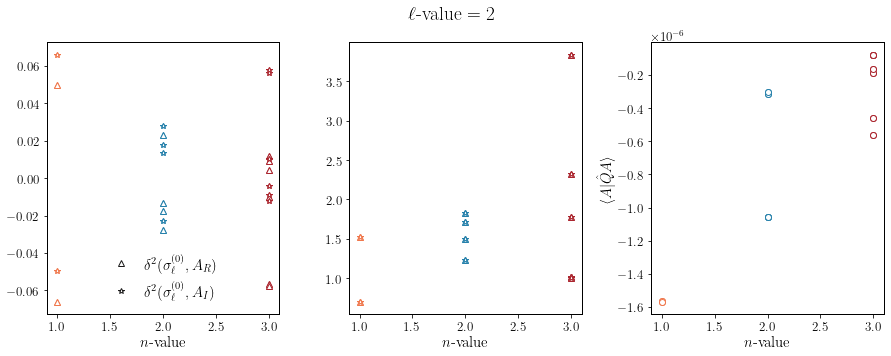

In [18]:
ell = 2

dat_AR, dat_ARP = [], []
dat_AI, dat_AIP = [], []
for i in range(1, 4):
    nameAR = 'datosAR_l_%1d_n%1d.dat'%(ell, i)
    nameAI = 'datosAI_l_%1d_n%1d.dat'%(ell, i)

    _, nodos, _, _, _, _, deltaA_R, deltaA_RP = np.loadtxt(nameAR, unpack=True)
    _, _, lamR, lamI, int2, int22, deltaA_I, deltaA_IP = np.loadtxt(nameAI, unpack=True)
    
    dat_AR.append([nodos, deltaA_R])
    dat_ARP.append([nodos, deltaA_RP])
    dat_AI.append([nodos, deltaA_I])
    dat_AIP.append([nodos, deltaA_IP])

dat_AR = np.array(dat_AR)
dat_ARP = np.array(dat_ARP)
dat_AI = np.array(dat_AI)
dat_AIP = np.array(dat_AIP)


col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(15,5),
                       gridspec_kw={'wspace':0.3, 'hspace':0})
for ii in range(1, 4):
    j = ii-1
    ax[0].plot(dat_AR[j][0], dat_AR[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[0].plot(dat_AI[j][0], dat_AI[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[1].plot(dat_ARP[j][0], dat_ARP[j][1], ls=' ', color=col[ii], marker='^', mfc='white')
    ax[1].plot(dat_AIP[j][0], dat_AIP[j][1], ls=' ', color=col[ii], marker='*', mfc='white')
    
    ax[2].plot(dat_AR[j][0], dat_AR[j][1]+dat_AI[j][1], ls=' ', color=col[ii], marker='o', mfc='white')

ax[0].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[0].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'$\delta^{2}(\sigma_\ell^{(0)},A_I$)')

ax[1].plot([], [], ls=' ', color=col[0], marker='^', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_R$)')
ax[1].plot([], [], ls=' ', color=col[0], marker='*', mfc='white', 
           label=r'Rel $\delta^{2}(\sigma_\ell^{(0)},A_I$)')


ax[0].legend(frameon=False)

ax[0].set_xlabel(r'$n$-value')
ax[1].set_xlabel(r'$n$-value')
ax[2].set_xlabel(r'$n$-value')

ax[2].set_ylabel(r'$\langle A| \hat{Q} A \rangle$')

fig.suptitle(r'$\ell$-value = %1d'%ell)